In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/happiness_score_dataset.csv")
df.head()
pd.set_option('display.max_rows', None)

In [6]:
df.shape

(158, 12)

In [7]:
df.describe()
#DESCRIBES THAT THERE ARE NO UNexpected outliers
#nO missing values in int variables

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.isnull().sum()
#No Missing Values in the columns

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.info()
#All are int values, No need of Encoding needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

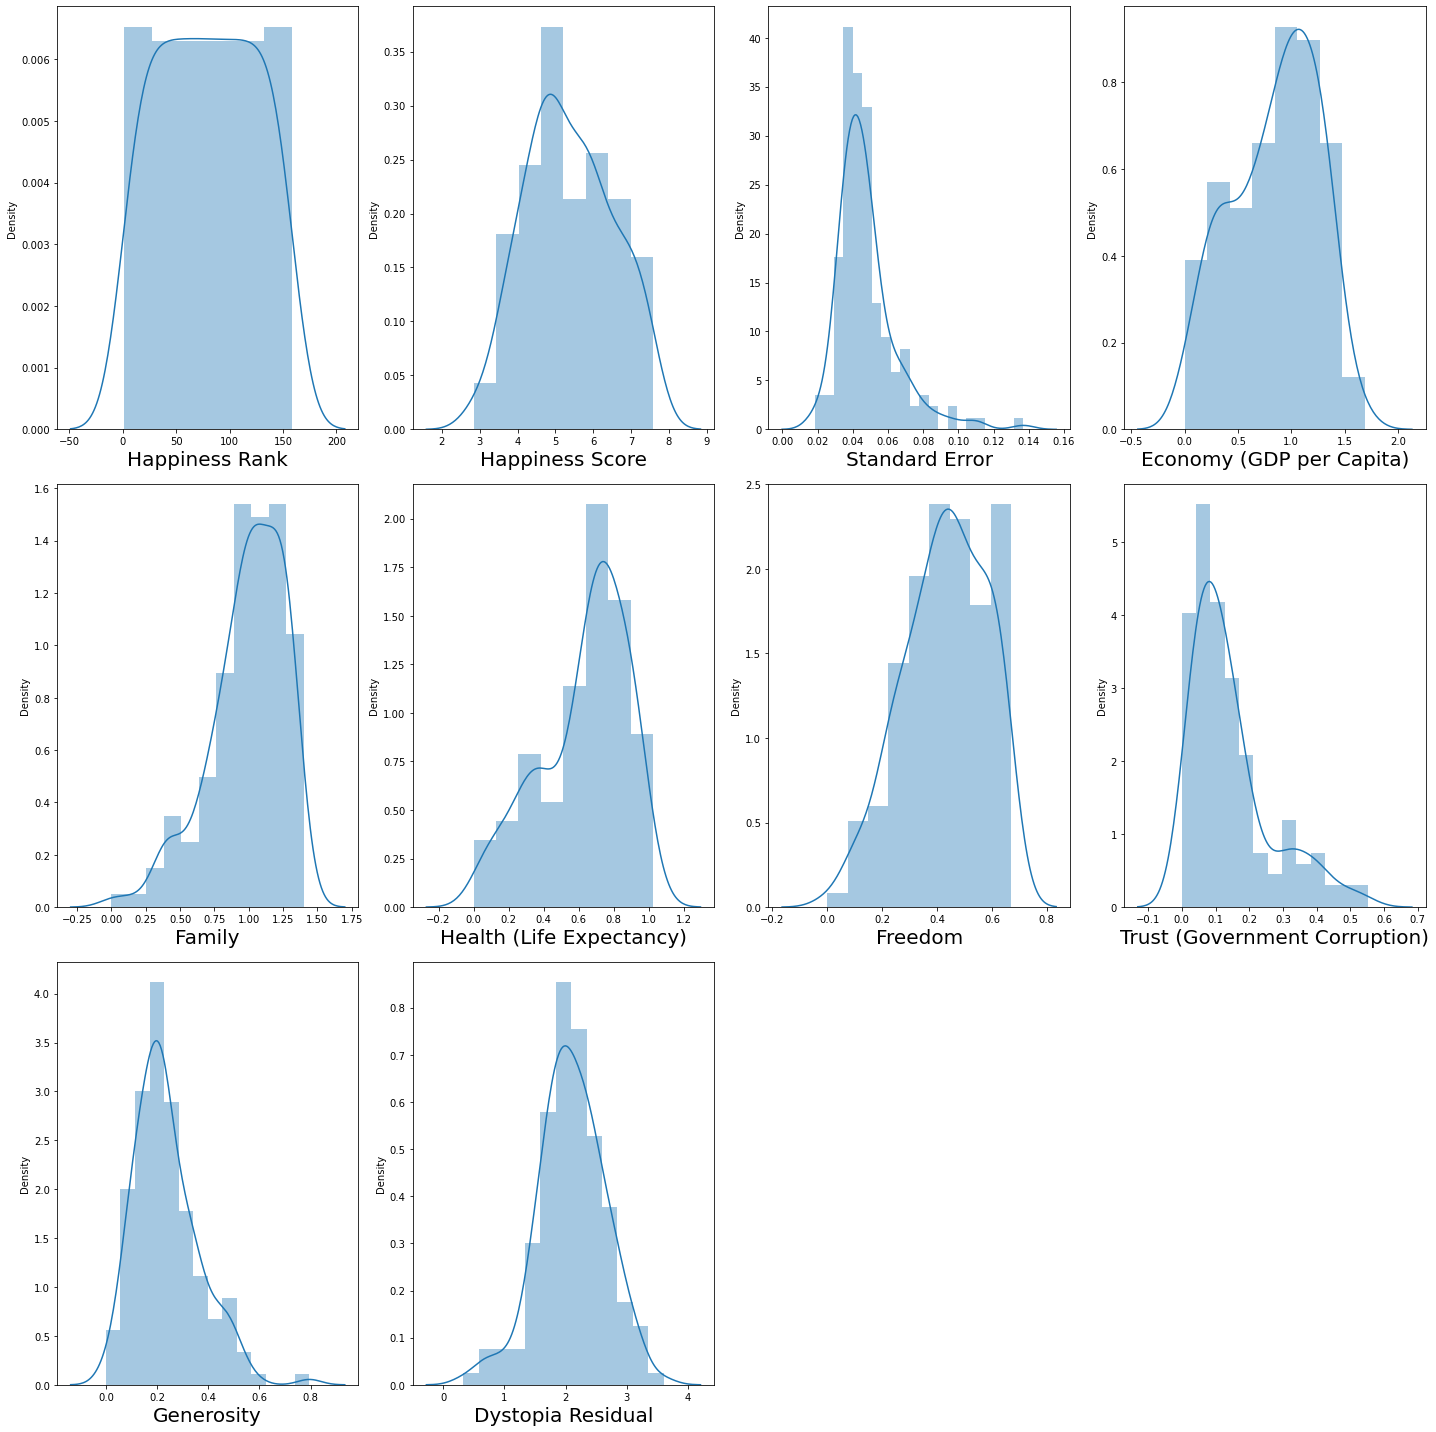

In [10]:
df_plots=df.drop(columns=['Country','Region'])


plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_plots:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df_plots[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  



In [11]:
#It looks like there is screwness in the data 
df_plots.skew().sort_values(ascending=False)
#Looks like Standard Error and  Trust (Government Corruption) are no between -0.5 to + 0.5, So need to correct the screwness in the data

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Happiness Score                  0.097769
Happiness Rank                   0.000418
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [12]:
corr=df_plots.corr()
corr.shape

(10, 10)

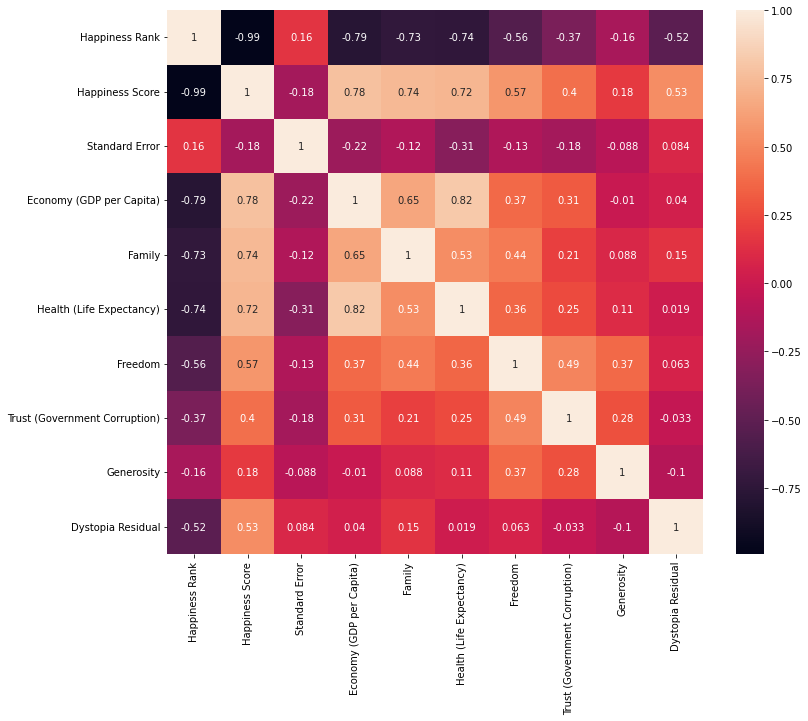

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()
#Looks like correlation sen between-Economy(GDP per Capita) is correlated Health(life expectency) But would keep both in the model as in reality there are not really closel related is my understanding
#As the parameters are plots, Multicollinerarity issue can be observed between fatures.


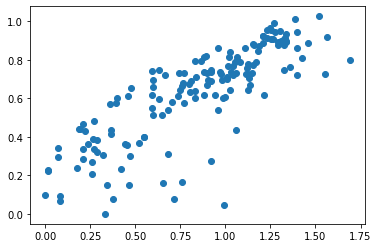

In [14]:
mydata= df_plots[["Economy (GDP per Capita)", "Health (Life Expectancy)"]]
mydata
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])

#Screwness Correction in data disctribution

#Scale the Data

#Train the Data

#Test the data

#metrix the data

#Hyperparameter tuning-Randamised search CV, Grid Search CV, K fold CV


#Model Training
Will Choose regression Models
1)Linear Regression
2)Randam Forest Regressor
3)Adaboost Regressor
4)Xtream Gradient Boosting regressor


In [15]:
x=df_plots.drop(columns=['Happiness Score'],axis=1)
y=df_plots['Happiness Score']
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,9,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [16]:
#Screwness Correction
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew().sort_values(ascending=False)
#Now the screwness is rectified from Fetures

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Happiness Rank                  -0.264365
dtype: float64

In [17]:
#Scale the data, as Redidue scale is larger then other features.
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-2.06341393, -0.9722262 ,  1.44606101, ...,  1.77399061,
         0.62239051,  0.75099154],
       [-2.00849761,  0.30934969,  1.17332111, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.95857395, -1.06201662,  1.23983557, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 1.52535242,  0.39913742, -0.5134688 , ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.54254416,  1.92690194, -1.89495386, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.55970548,  1.31032295, -1.52122584, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [18]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

0.9855354764725499


In [20]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.9966849824050277


In [21]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.9947550796083285


In [22]:
# Making sure the Model is not Overfitting we are conducting Crossvalidation techniques
from sklearn.model_selection import cross_val_score
CS_reg=cross_val_score(reg,x_scaled,y,cv=5)
CS_reg.mean()

0.7588140573583225

In [23]:
CS_ada=cross_val_score(ada,x_scaled,y,cv=5)
CS_ada.mean()

-2.651622632089376

In [24]:
CS_RFR=cross_val_score(RFR,x_scaled,y,cv=10)
CS_RFR.mean()

-1.5331047389585992

In [25]:
# Not sure of Cross validation Score to be Negetive
#There might be data which is not ranamized so tried KFold Cross Validation

In [26]:
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f

KFold(n_splits=5, random_state=None, shuffle=True)

In [36]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    X_train , X_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    reg.fit(X_train,y_train)
    pred_values = reg.predict(X_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9941269683882528, 0.979913687109219, 0.9956335405036941, 0.9866848412616246, 0.9967761209210811]
Avg accuracy : 0.9906270316367743


In [37]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    X_train , X_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    ada.fit(X_train,y_train)
    pred_values = ada.predict(X_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9939618778436227, 0.9941006226114406, 0.9938759712128822, 0.9950711445839527, 0.9931473574786233]
Avg accuracy : 0.9940313947461042


In [38]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    X_train , X_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    RFR.fit(X_train,y_train)
    pred_values = RFR.predict(X_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9942871044256554, 0.9950966572753469, 0.9985016684045196, 0.998524239910913, 0.9972677102817512]
Avg accuracy : 0.9967354760596374


In [39]:
#I will Go ahead with randam Forest a Hypertune this model